# 1.Adım:
# Veri setini ekrana gösterme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv("MW_hourly.txt")
print("="*50)
print("İlk Bes Sira ","\n")
print(df.head(5),"\n")
print("="*50)
print("Son Bes Sira ","\n")
print(df.tail(5),"\n")
print("="*50)
print("Veri Kümesi Hakkinda Bilgi","\n")
print(df.info(),"\n")

print("="*50)
print("Veri Kümesini Tanımlayalım (Kategorik tür) ","\n")
print(df.describe(),"\n")

print("="*50)
print("Bos Değerler t ","\n")
print(df.isnull().sum(),"\n")

İlk Bes Sira  

              Datetime      MW
0  2004-12-31 01:00:00  1596.0
1  2004-12-31 02:00:00  1517.0
2  2004-12-31 03:00:00  1486.0
3  2004-12-31 04:00:00  1469.0
4  2004-12-31 05:00:00  1472.0 

Son Bes Sira  

                   Datetime      MW
121270  2018-01-01 20:00:00  2732.0
121271  2018-01-01 21:00:00  2724.0
121272  2018-01-01 22:00:00  2664.0
121273  2018-01-01 23:00:00  2614.0
121274  2018-01-02 00:00:00  2552.0 

Veri Kümesi Hakkinda Bilgi 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121275 entries, 0 to 121274
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121275 non-null  object 
 1   MW        121275 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Veri Kümesini Tanımlayalım (Kategorik tür)  

                  MW
count  121275.000000
mean     2037.851140
std       393.403153
min       982.000000
25%      1749.000000
50%      2009.000000
75%      22

# 2. Adım:
# Tarih Saat Sütunlarını Yeniden Biçimlendirelim

In [3]:
# Yılın Ayı, Günü, Saati vb. Gibi Tüm Verileri Çıkartıyoruz
dataset = df
dataset["Ay"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Yil"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Tarih"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Saat"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Hafta"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Gün"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,MW,Ay,Yil,Tarih,Saat,Hafta,Gün
Datetime,,,,,,,
2004-12-31 01:00:00,1596.0,12,2004,2004-12-31,01:00:00,53,Friday


# 3.Adım:
# Veri kümesinde kaç tane benzersiz yılımız var onu bulalım.

In [4]:
# Veri Kümesinde Kaç Benzersiz Yılımız Var
print(df.Yil.unique(),"\n")
print("Toplam Benzersiz Yil Sayisi:", df.Yil.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Toplam Benzersiz Yil Sayisi: 15 



In [5]:
# Veri Kümesinde Kaç Benzersiz Ayımız Var
print(df.Ay.unique(),"\n")
print("Toplam Benzersiz Ay Sayisi:", df.Ay.nunique(), "\n")
print("Toplam  Ay Sayisi:", df.Ay.nunique()*df.Yil.nunique(), "\n")

[12  1 11 10  9  8  7  6  5  4  3  2] 

Toplam Benzersiz Ay Sayisi: 12 

Toplam  Ay Sayisi: 180 



# 4.adım:
# Veri kümesini grafikler ile gösterim

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Yillara Göre Enerji Tüketimi')

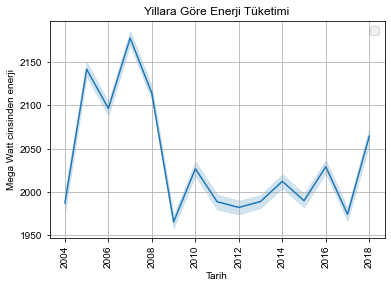

In [6]:
#Çizgi Grafiği
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Yil"], y=dataset["MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Yillara Göre Enerji Tüketimi")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Yillara Göre Enerji Tüketimi')

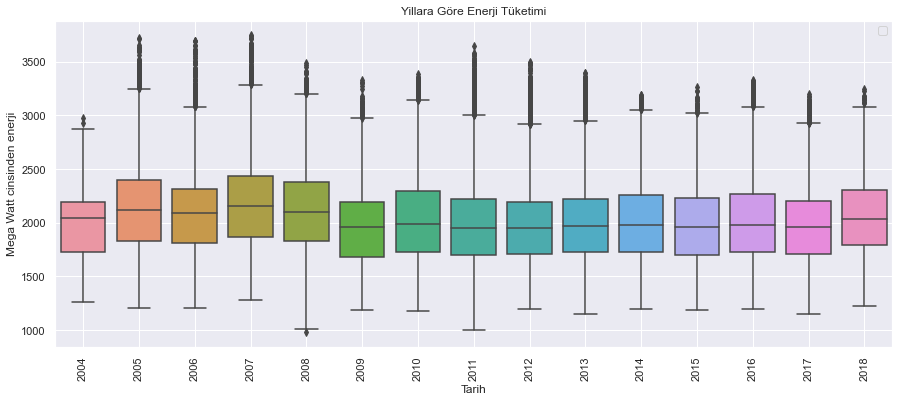

In [7]:
#Kutu Grafiği
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.boxplot(x=dataset["Yil"], y=dataset["MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("2004 Yılında Enerji Tüketimi")
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Yillara Göre Enerji Tüketimi")

No handles with labels found to put in legend.


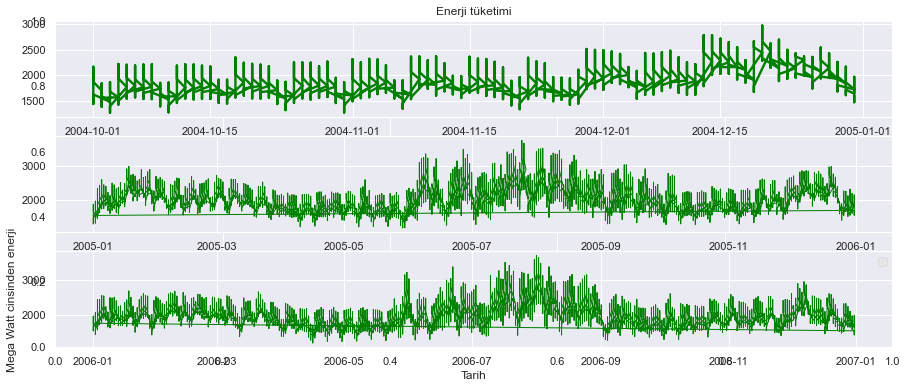

In [8]:
from matplotlib import style

fig = plt.figure()

plt.title("Enerji tüketimi")
ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["MW"].to_list()
x_2004 = dataset["2004"]["Tarih"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=2.4)


y_2005 = dataset["2005"]["MW"].to_list()
x_2005 = dataset["2005"]["Tarih"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["MW"].to_list()
x_2006 = dataset["2006"]["Tarih"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)

plt.rcParams["figure.figsize"] = (18,8)
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.grid(True, alpha=1)
plt.legend()


No handles with labels found to put in legend.


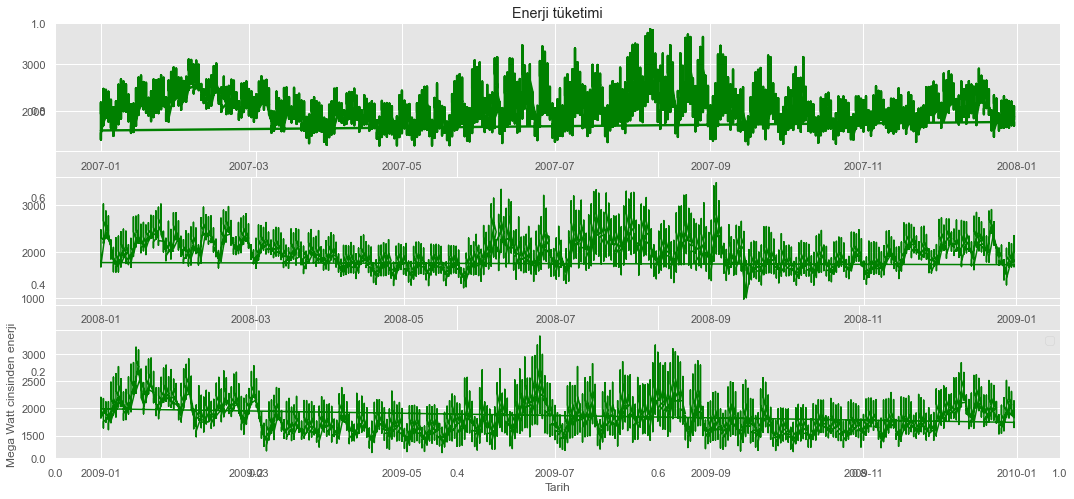

In [9]:
from matplotlib import style

fig = plt.figure()

plt.title("Enerji tüketimi")
ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2007 = dataset["2007"]["MW"].to_list()
x_2007 = dataset["2007"]["Tarih"].to_list()
ax1.plot(x_2007,y_2007, color="green", linewidth=2.4)


y_2008 = dataset["2008"]["MW"].to_list()
x_2008 = dataset["2008"]["Tarih"].to_list()
ax2.plot(x_2008, y_2008, color="green", linewidth=1.5)


y_2009 = dataset["2009"]["MW"].to_list()
x_2009 = dataset["2009"]["Tarih"].to_list()
ax3.plot(x_2009, y_2009, color="green", linewidth=1.5)

plt.rcParams["figure.figsize"] = (18,8)
plt.xlabel("Tarih")
plt.ylabel("Mega Watt cinsinden enerji")
plt.grid(True, alpha=1)
plt.legend()



Text(0.5, 1.0, 'Enerji Dağılımı')

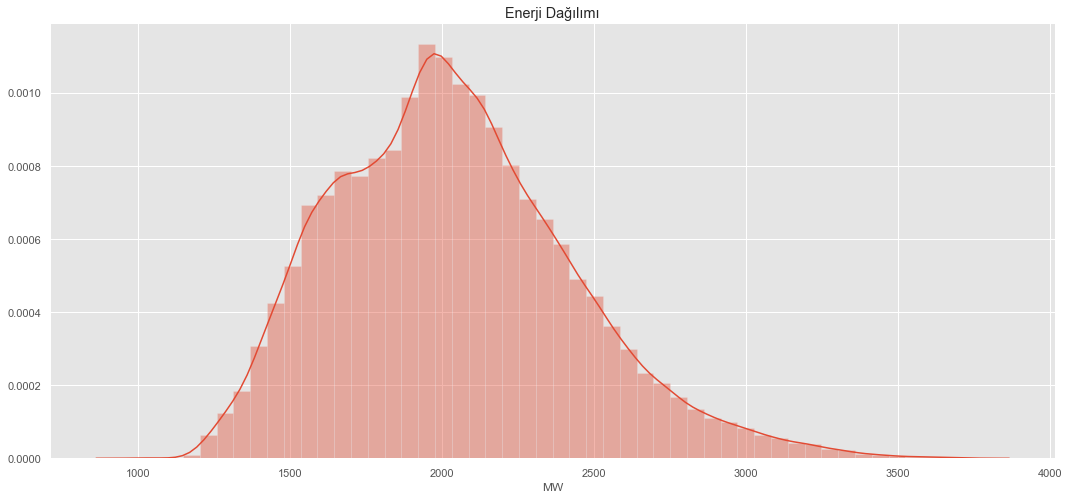

In [10]:
#Histogram Grafiği
sns.distplot(dataset["MW"])
plt.title("Enerji Dağılımı")

# Zamana göre enerji dağılımı

In [11]:
pd.plotting.register_matplotlib_converters()

No handles with labels found to put in legend.


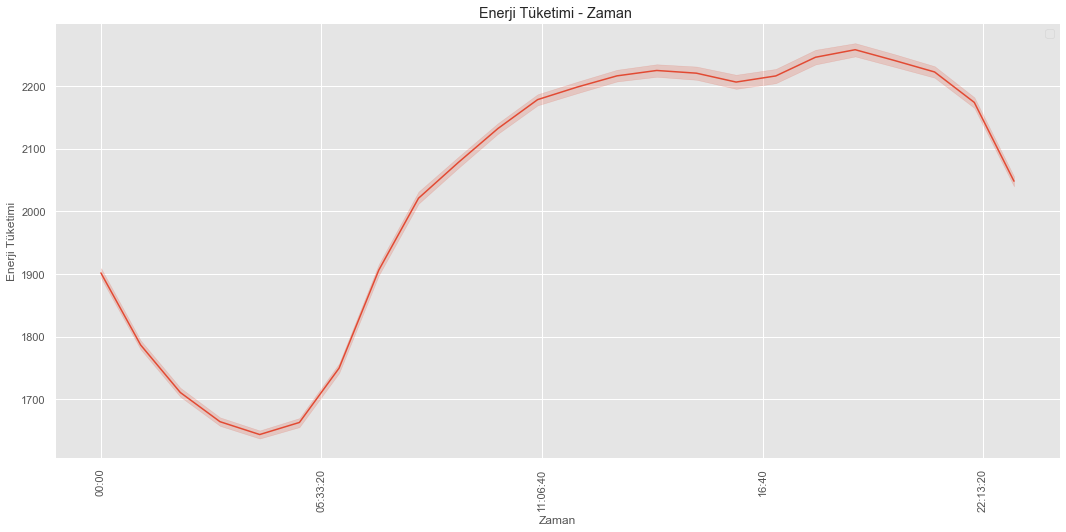

In [12]:
#Zamana Göre Çizgi Grafiği
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Saat"],y=dataset["MW"], data=df)
plt.title("Enerji Tüketimi - Zaman ")
plt.xlabel("Zaman")
plt.ylabel("Enerji Tüketimi")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No handles with labels found to put in legend.


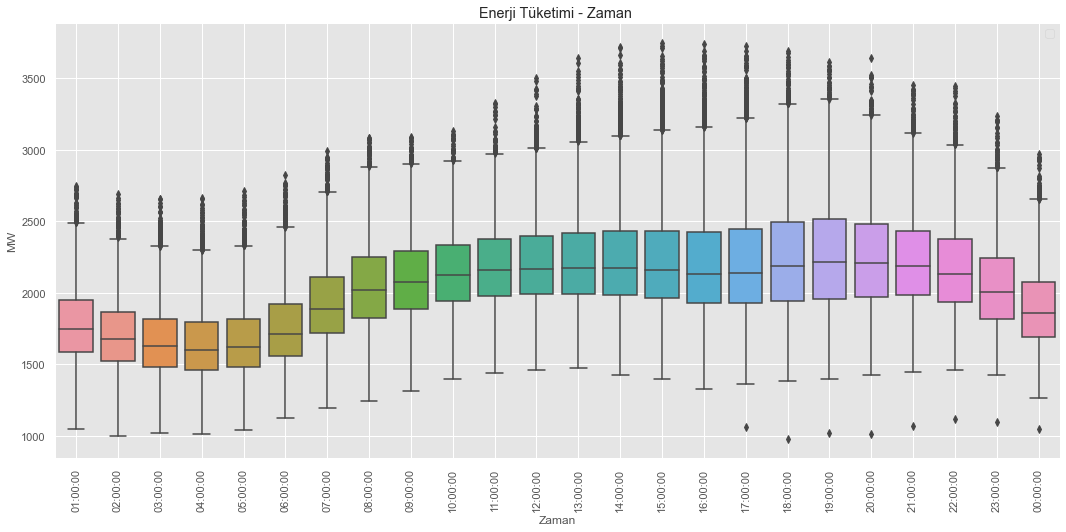

In [13]:
#Zamana Göre Kutu Grafiği
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.boxplot(x=dataset["Saat"],y=dataset["MW"], data=df)
plt.title("Enerji Tüketimi - Zaman ")
plt.xlabel("Zaman")
plt.ylabel("MW")
plt.grid(True, alpha=1)

plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

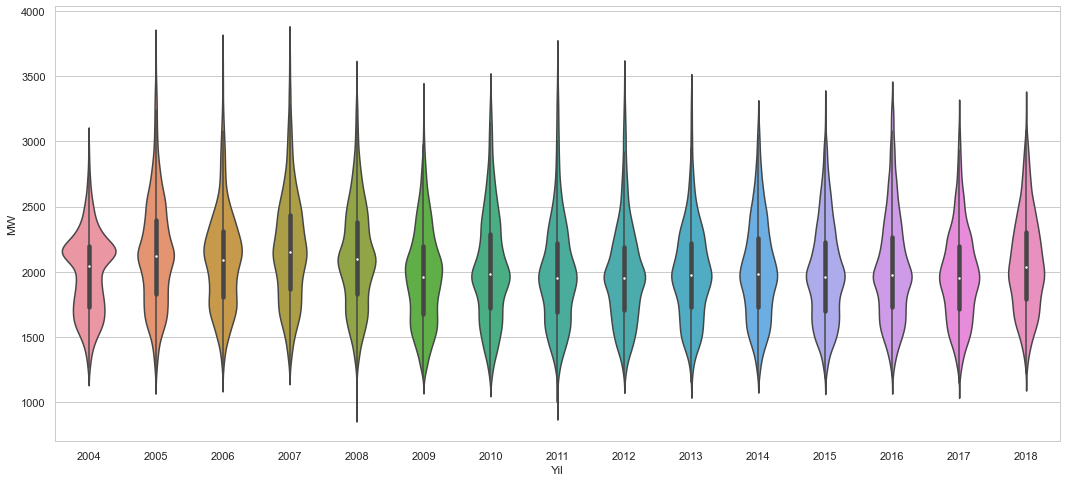

In [14]:
#Violin(keman) Grafiği
sns.set_style('whitegrid')
sns.violinplot(x = 'Yil', y = 'MW', data = df)

#  Test ve Train İşlemleri

In [15]:
NewDataSet = dataset.resample('D').mean()

In [16]:
print("Old Dataset ",dataset.shape ) # Veri setimizin eski veri sayısı
print("New  Dataset ",NewDataSet.shape ) # Veri setinin yeni veri sayısı (Gün bazında)

Old Dataset  (121275, 7)
New  Dataset  (5055, 4)


In [17]:
TestData = NewDataSet.tail(100)
Training_Set = NewDataSet.iloc[:,0:1]
Training_Set = Training_Set[:-60]

In [18]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [19]:
#Training_Set'in ilk 10 verisini head metodu ile ekrana yansıttık.
Training_Set.head(10) 

,MW
Datetime,
2004-10-01,1924.130435
2004-10-02,1641.583333
2004-10-03,1528.708333
2004-10-04,1926.541667
2004-10-05,1970.125000
2004-10-06,1982.458333
2004-10-07,1975.583333
2004-10-08,1962.625000
2004-10-09,1681.250000


In [20]:
#Training_Set'in son 10 verisini tail metodu ile ekrana yansıttık.
Training_Set.tail(10)

,MW
Datetime,
2018-05-26,1827.708333
2018-05-27,1940.541667
2018-05-28,2112.208333
2018-05-29,2443.750000
2018-05-30,2453.000000
2018-05-31,2412.916667
2018-06-01,2204.208333
2018-06-02,1962.708333
2018-06-03,1854.375000


In [21]:
#TestData'nın ilk 10 verisini head metodu ile ekrana yansıttık.
TestData.head(10) 

,MW,Ay,Yil,Hafta
Datetime,,,,
2018-04-26,1806.666667,4,2018,17
2018-04-27,1721.375000,4,2018,17
2018-04-28,1578.083333,4,2018,17
2018-04-29,1552.291667,4,2018,17
2018-04-30,1814.333333,4,2018,18
2018-05-01,1819.083333,5,2018,18
2018-05-02,1923.958333,5,2018,18
2018-05-03,1978.041667,5,2018,18
2018-05-04,1916.125000,5,2018,18


In [22]:
type(Training_Set.values)

numpy.ndarray

In [23]:
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [24]:
X_Train = []
Y_Train = []

for i in range(60, Train.shape[0]):
    
    X_Train.append(Train[i-60:i])
    Y_Train.append(Train[i])


X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [25]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [26]:
#Gerekli Keras kütüphanelerini ve tensorflow kütüphanesini yazıyoruz.
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [27]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
history=regressor.fit(X_Train, Y_Train, epochs = 30, batch_size = 32)

Epoch 1/30
155/155 [==============================] - 9s 56ms/step - loss: 0.0053: 0s - l
Epoch 2/30
155/155 [==============================] - 9s 59ms/step - loss: 0.0052
Epoch 3/30
155/155 [==============================] - 9s 59ms/step - loss: 0.0053
Epoch 4/30
155/155 [==============================] - 9s 59ms/step - loss: 0.0053
Epoch 5/30
155/155 [==============================] - 9s 60ms/step - loss: 0.0051
Epoch 6/30
155/155 [==============================] - 9s 59ms/step - loss: 0.0052
Epoch 7/30
155/155 [==============================] - 9s 61ms/step - loss: 0.0050
Epoch 8/30
155/155 [==============================] - 9s 59ms/step - loss: 0.0051
Epoch 9/30
155/155 [==============================] - 9s 57ms/step - loss: 0.0050
Epoch 10/30
155/155 [==============================] - 9s 59ms/step - loss: 0.0050
Epoch 11/30
155/155 [==============================] - 9s 58ms/step - loss: 0.0050: 0s - l
Epoch 12/30
155/155 [==============================] - 9s 57ms/step - loss: 0.00

In [30]:
#İşlem sonunda History'deki tüm veri kümelerini listeledik
print(history.history.keys())

dict_keys(['loss'])


No handles with labels found to put in legend.


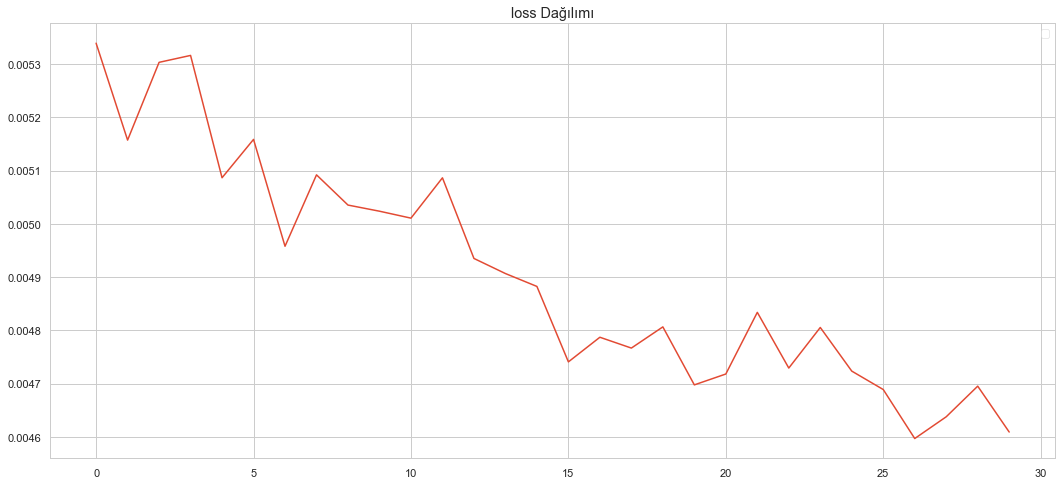

In [31]:
plt.plot(history.history['loss'])
plt.title("loss Dağılımı")
plt.legend()

In [32]:
#TestDatasındaki 100 veriden son 10 veriyi ekrana yazdırdık.Bunun için tail() metodunu kullandık.
TestData.tail(10) 

,MW,Ay,Yil,Hafta
Datetime,,,,
2018-07-25,2321.166667,7,2018,30
2018-07-26,2300.333333,7,2018,30
2018-07-27,2126.541667,7,2018,30
2018-07-28,1810.083333,7,2018,30
2018-07-29,1738.791667,7,2018,30
2018-07-30,2026.333333,7,2018,31
2018-07-31,2051.083333,7,2018,31
2018-08-01,2060.291667,8,2018,31
2018-08-02,2168.208333,8,2018,31


In [33]:
TestData.shape

(100, 4)

In [34]:
NewDataSet.shape

(5055, 4)

In [35]:
Df_Total = pd.concat((NewDataSet[["MW"]], TestData[["MW"]]), axis=0)

In [36]:
Df_Total.shape

(5155, 1)

In [37]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [38]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Tahmini_tuketim = regressor.predict(X_test)
Tahmini_tuketim = sc.inverse_transform(Tahmini_tuketim)

In [39]:
Gercek_MegaWatt = TestData["MW"].to_list()
Tahmin_MegaWatt  = Tahmini_tuketim
dates = TestData.index.to_list()

In [40]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "Gercek MegaWatt": Gercek_MegaWatt,
    "Tahmin MegaWatt":[x[0] for x in Tahmin_MegaWatt ]
})

In [41]:
#Machine_Df veri kümesini ekrana yansıtıyoruz.
Machine_Df

,Date,Gercek MegaWatt,Tahmin MegaWatt
0,2018-04-26,1806.666667,1794.933594
1,2018-04-27,1721.375000,1753.951172
2,2018-04-28,1578.083333,2011.202026
3,2018-04-29,1552.291667,1826.279541
4,2018-04-30,1814.333333,1710.592651
...,...,...,...
95,2018-07-30,2026.333333,2025.262451
96,2018-07-31,2051.083333,2087.796875
97,2018-08-01,2060.291667,2065.374756
98,2018-08-02,2168.208333,2073.769043


In [42]:
Gercek_MegaWatt = TestData["MW"].to_list()
Tahmin_MegaWatt  = [x[0] for x in Tahmin_MegaWatt ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


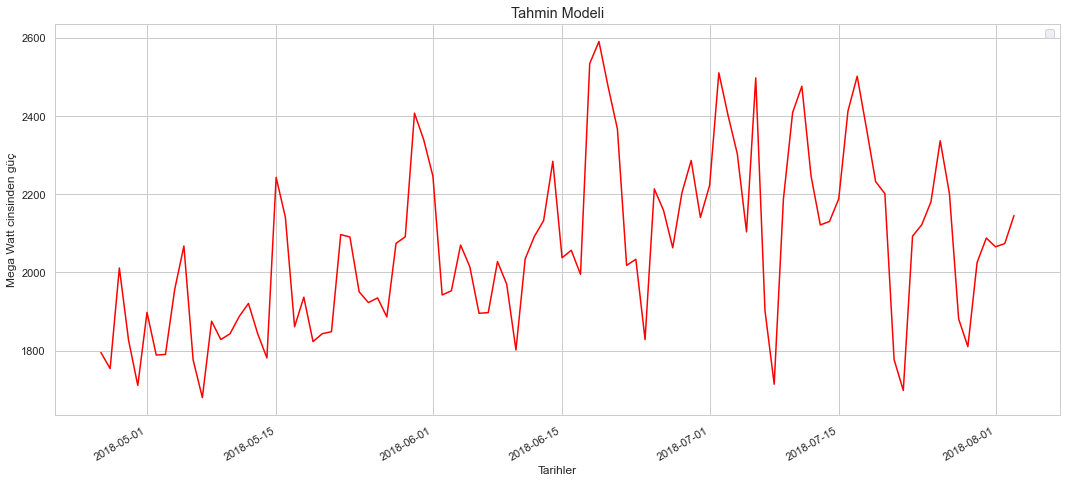

In [43]:
fig = plt.figure()
ax1= fig.add_subplot(111)

style.use('ggplot')
plt.title('Tahmin Modeli')

x = dates
y1 = Tahmin_MegaWatt
sns.lineplot(x,y1, color="red")
sns.set(rc={'figure.figsize':(15,6)})
plt.gcf().autofmt_xdate()

plt.xlabel('Tarihler')
plt.ylabel("Mega Watt cinsinden güç")

plt.legend()

No handles with labels found to put in legend.


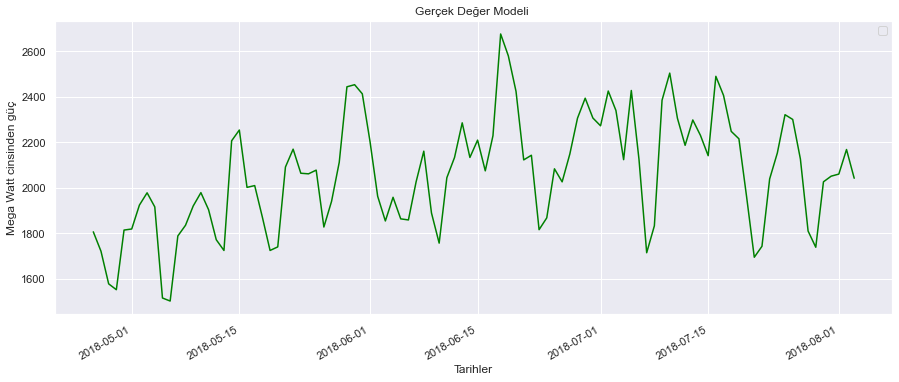

In [44]:
fig = plt.figure()
ax1= fig.add_subplot(111)
plt.title('Gercek değer Modeli')

style.use('ggplot')
x = dates
y = Gercek_MegaWatt

sns.lineplot(x,y, color="green")
sns.set(rc={'figure.figsize':(15,6)})
plt.gcf().autofmt_xdate()

plt.xlabel('Tarihler')
plt.ylabel("Mega Watt cinsinden güç")
plt.title("Gerçek Değer Modeli ")
plt.legend()

No handles with labels found to put in legend.


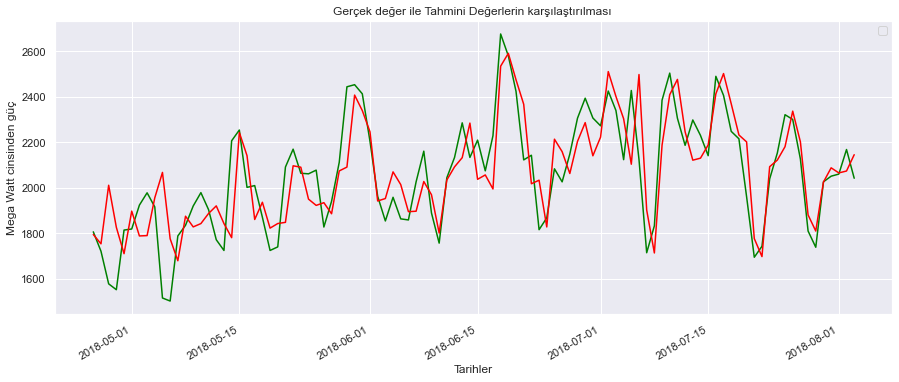

In [45]:
fig = plt.figure()
ax1= fig.add_subplot(111)
plt.title('Gercek değer ile Tahmin Modelinin karşılaştırılması')
style.use('ggplot')

x = dates
y = Gercek_MegaWatt
y1 = Tahmin_MegaWatt

sns.lineplot(x,y, color="green")
sns.lineplot(x,y1, color="red")
sns.set(rc={'figure.figsize':(15,6)})
plt.gcf().autofmt_xdate()

plt.xlabel('Tarihler')
plt.ylabel("Mega Watt cinsinden güç")
plt.title("Gerçek değer ile Tahmini Değerlerin karşılaştırılması ")
plt.legend()